In [148]:
%matplotlib inline

import glob
import os
import seaborn as sns
import pandas as pd

from gscripts.general import region_helpers

In [135]:
# master_processing_table = pd.read_table("/home/elvannostrand/data/ENCODE/project_stuff/ENCODE_MASTER_ID_LIST_20160301_AllDatasets.txt", 
#                                         sep="\t",
#                                         skiprows=1,
#                                         names=["UID", "RBP_gID", "CellLine", "RBP_ENSG", "Antibody", "Lot", "CLIP_ENCODEAccID", "CLIP_Rep1ENC", "CLIP_Rep2ENC", "CLIP_InputENC", "RNASEQ_ENCODEAccID",  "Duplicate_RNASEQ_ENCODEAccID", "RNASEQ_ControlENC", "RNASEQ_KDRep1Bam", "RNASEQ_KDRep2Bam", "RNASEQ_ControlRep1Bam", "RNASEQ_ControlRep2Bam", "bar"]
# )

master_processing_table = pd.read_table("/home/gpratt/Dropbox/encode_integration/20160408_ENCODE_MASTER_ID_LIST_AllDatasets.csv", index_col=0 )

In [136]:
all_kds = glob.glob("/home/gpratt/Dropbox/encode_integration/rnai_processing/ENC*.csv")

In [149]:
gene_id_to_name = region_helpers.gene_id_to_name("/projects/ps-yeolab/genomes/hg19/gencode/v19/gencode.v19.annotation.gtf.db")
gene_id_to_type = region_helpers.gene_id_to_type("/projects/ps-yeolab/genomes/hg19/gencode/v19/gencode.v19.annotation.gtf.db")
ensembl_id_to_name = {key.split(".")[0]: value for key, value in gene_id_to_name.items()}

name_to_gene_id = {value: key for key, value in gene_id_to_name.items()}

In [ ]:
all_dfs = {}
for fn in all_kds:
    unfiltered_df = pd.read_csv(fn, index_col=0)
    #unfiltered_df = unfiltered_df[unfiltered_df.padj < .05]
    all_dfs[os.path.basename(fn).split(".")[0]] = unfiltered_df
    
# all_dfs = pd.concat({fn: pd.read_csv(fn, index_col=0) for fn in all_kds})
all_dfs = pd.concat(all_dfs)

In [146]:
all_dfs.index.get_level_values(level=1).map(lambda x: gene_id)

baseMean  log2FoldChange  \
ENCSR000KYM_vs_ENCSR913CAE ENSG00000142627.9      788.125584        6.202118   
                           ENSG00000206652.1    11977.718977       -7.373441   
                           ENSG00000207513.1    11976.260373       -7.373422   
                           ENSG00000207389.1    12040.695842       -7.372124   
                           ENSG00000207005.1    12020.260713       -7.330706   
                           ENSG00000074964.12     423.826584        7.002209   
                           ENSG00000162415.6      342.009273        6.195054   
                           ENSG00000162407.8      224.752464        5.963689   
                           ENSG00000079739.11     440.559477        6.625024   
                           ENSG00000137962.8      411.525903        6.754682   
                           ENSG00000207418.1    12036.899572       -7.343209   
                           ENSG00000131781.8      462.948430        6.408874   
                           ENSG00000206585.1    12036.899572       -7.343209   
                           ENSG00000206737.1    12077.133613       -7.384593   
                           ENSG00000184260.4     1015.107632       -5.761980   
                           ENSG00000158874.7     8505.690185        6.939129   
                           ENSG00000143153.8     1411.040891        5.673774   
                           ENSG00000135862.5     2494.800298        6.684071   
                           ENSG00000196208.9      849.522297        6.751822   
                           ENSG00000115884.6     1172.414185        5.965694   
                           ENSG00000143878.8     1288.412950        6.205536   
                           ENSG00000084734.4      188.524693        5.999284   
                           ENSG00000150938.5      963.158017        6.432625   
                           ENSG00000071073.8      791.214341        6.064457   
                           ENSG00000157827.15    1770.969815        6.213367   
                           ENSG00000115183.9      335.891626        5.973023   
                           ENSG00000241399.2      177.140606        6.615886   
                           ENSG00000153250.13     510.889432        6.201724   
                           ENSG00000204335.3      355.050590        6.143304   
                           ENSG00000115414.14   88583.504644        6.196453   
...                                                      ...             ...   
ENCSR998RZI_vs_ENCSR603TCV ENSG00000101004.10     269.102902        5.942328   
                           ENSG00000088340.11     125.138884        6.555703   
                           ENSG00000225091.3      241.423360       -4.421953   
                           ENSG00000201512.1      114.277476       -3.611081   
                           ENSG00000092758.11     361.615278        5.577516   
                           ENSG00000154639.14     324.193720        5.906917   
                           ENSG00000234340.1       27.380455       -5.068249   
                           ENSG00000142192.16     780.051525        6.490236   
                           ENSG00000269430.1       61.952181        5.959331   
                           ENSG00000228709.1       76.351049        6.121607   
                           ENSG00000272216.1      178.280053        3.689013   
                           ENSG00000100234.11     465.335641        5.986612   
                           ENSG00000235513.1       16.373174       -5.063144   
                           ENSG00000202058.1      638.907417       -7.637622   
                           ENSG00000270022.2       45.780866       -7.458939   
                           ENSG00000232392.1       26.210623       -6.904135   
                           ENSG00000047634.10     289.947588        6.783659   
                           ENSG00000187243.12     880.662478        7.116783   
                           ENSG00000154545.12     87

In [138]:
kd_to_rbp = dict(zip(master_processing_table.RNASEQ_ENCODEAccID, master_processing_table.RBP_gID))
kd_to_cell_type = dict(zip(master_processing_table.RNASEQ_ENCODEAccID, master_processing_table.CellLine))

In [139]:
num_diff_expressed = pd.DataFrame(all_dfs.groupby(level=0).count().baseMean)

In [140]:
dfs = pd.concat({"upregulated": all_dfs[all_dfs.log2FoldChange > 2],
          "downregulated":  all_dfs[all_dfs.log2FoldChange < -2]})

In [141]:
num_diff_expressed = dfs.groupby(level=[0,1]).count().baseMean.unstack().T

In [142]:
num_diff_expressed['rbp'] = num_diff_expressed.index.map(lambda x: kd_to_rbp[x.split("_vs_")[0]])
num_diff_expressed['cell_type'] = num_diff_expressed.index.map(lambda x: kd_to_cell_type[x.split("_vs_")[0]])

In [145]:
dfs.xs("ENCSR611ZAL_vs_ENCSR344XID", level=1)

,,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
downregulated,ENSG00000232176.1,999.091239,-4.000606,0.735856,-5.436669,5.428589e-08,0.001747


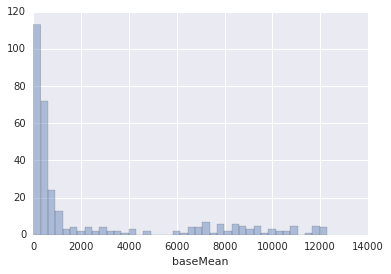

In [86]:
sns.distplot(num_diff_expressed, kde=False, bins=40)